In [1]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["My name is Parthib"])

CountVectorizer()

In [2]:
v.vocabulary_

{'my': 1, 'name': 2, 'is': 0, 'parthib': 3}

In [3]:
v = CountVectorizer(ngram_range=(1,2))

In [4]:
v.fit(["parthib is a Good Boy"])

CountVectorizer(ngram_range=(1, 2))

In [5]:
v.vocabulary_

{'parthib': 5,
 'is': 3,
 'good': 1,
 'boy': 0,
 'parthib is': 6,
 'is good': 4,
 'good boy': 2}

In [7]:
v = CountVectorizer(ngram_range=(3,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor hathodawala is': 3,
 'hathodawala is looking': 0,
 'is looking for': 1,
 'looking for job': 2}

In [8]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [9]:
import spacy
nlp = spacy.load("en_core_web_sm") 

In [15]:
def preprocess(text):

    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 
         

In [16]:
preprocess("Thor ate pizza")

'thor eat pizza'

In [17]:
corpus_processed = [
    preprocess(text) for text in corpus
]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [18]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [19]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [20]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [23]:
import pandas as pd

df = pd.read_json(r'E:\NLP SERIES\Data\news_dataset.json')

In [24]:
df

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME
...,...,...
12690,Coach Shakes Hands Of Imaginary Players After ...,SPORTS
12691,This Minivan-Sized Sea Sponge Is Thought To Be...,SCIENCE
12692,RECAP: Dramatic Eclipse Photos Don't miss the ...,SCIENCE
12693,Richard Sherman Wants To Talk About Police Sho...,SPORTS


In [26]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [27]:
min_samples = 1381

In [28]:
df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=2022)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=2022)

In [29]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [30]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
})

In [31]:
df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text, 
    df_balanced.category_num, 
    test_size=0.2, 
    random_state=2022,
    stratify=df_balanced.category_num
)

In [33]:
print(X_train.shape)
X_train.head()

(4419,)


7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [34]:
y_train.value_counts()

category_num
3    1105
2    1105
0    1105
1    1104
Name: count, dtype: int64

In [35]:
y_test.value_counts()

category_num
1    277
0    276
3    276
2    276
Name: count, dtype: int64

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [37]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('classifier', MultinomialNB())
])

In [38]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('classifier', MultinomialNB())])

In [39]:
clf.score(X_test, y_test)

0.8244343891402715

In [40]:

X_test[:5]

3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [42]:
y_pred = clf.predict(X_test)

In [44]:
y_pred[:5]

array([0, 0, 3, 0, 2], dtype=int64)

In [46]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,1))),
    ('classifier', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [47]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('classifier', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.96      0.73      0.83       277
           2       0.83      0.87      0.85       276
           3       0.93      0.76      0.83       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[252,   5,  11,   8],
       [ 38, 203,  31,   5],
       [ 32,   1, 239,   4],
       [ 56,   3,   7, 210]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

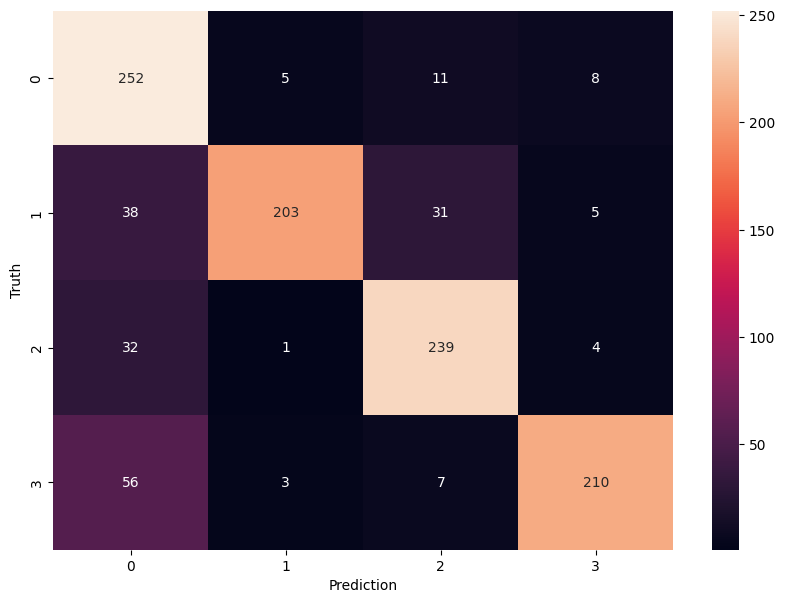

In [50]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')